## Pet Finder Competition

https://www.kaggle.com/competitions/petfinder-adoption-prediction

In [20]:
import pandas as pd
import seaborn as sns

##############################################################
# Lectura de dataset
##############################################################

# Dataset directory
ruta_dataset = "../../../petfinder_dataset/"

# Dataset
file_path = ruta_dataset + 'train/train.csv'
df = pd.read_csv(file_path)

df.head(1)


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2


In [21]:
# Breed labels
breed_path = ruta_dataset + "BreedLabels.csv"
df_breeds = pd.read_csv(breed_path)

df_breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


In [22]:
# Tamaño del dataset
print(df.shape)     # 14993 registros, 24 variables

# Name of columns
print(df.columns)

(14993, 24)
Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed'],
      dtype='object')


In [23]:
# Missing values per variable

# Cambio variables no especificadas (ejemplo: 0) a NA
df['MaturitySize'] = df['MaturitySize'].replace(0, pd.NA)
df['FurLength'] = df['FurLength'].replace(0, pd.NA)
df['Vaccinated'] = df['Vaccinated'].replace(3, pd.NA)
df['Dewormed'] = df['Dewormed'].replace(3, pd.NA)
df['Sterilized'] = df['Sterilized'].replace(3, pd.NA)
df['Health'] = df['Health'].replace(0, pd.NA)

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Campos faltantes por variable:")
print(missing_values)

Campos faltantes por variable:
Name           1265
Vaccinated     1868
Dewormed       1781
Sterilized     1815
Description      13
dtype: int64


In [24]:
# Dataset summary
print(df.describe())

               Type           Age        Breed1        Breed2        Gender  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       1.457614     10.452078    265.272594     74.009738      1.776162   
std        0.498217     18.155790     60.056818    123.011575      0.681592   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000    265.000000      0.000000      1.000000   
50%        1.000000      3.000000    266.000000      0.000000      2.000000   
75%        2.000000     12.000000    307.000000    179.000000      2.000000   
max        2.000000    255.000000    307.000000    307.000000      3.000000   

             Color1        Color2        Color3  MaturitySize     FurLength  \
count  14993.000000  14993.000000  14993.000000  14993.000000  14993.000000   
mean       2.234176      3.222837      1.882012      1.862002      1.467485   
std        1.745225      2.742562      2.984086    

### Variables Base
- PetID - Unique hash ID of pet profile
- AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
- Type - Type of animal (1 = Dog, 2 = Cat)
- Name - Name of pet (Empty if not named)
- Age - Age of pet when listed, in months
- Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
- Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
- Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
- Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
- Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
- Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
- MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
- FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
- Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
- Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
- Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
- Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
- Quantity - Number of pets represented in profile
- Fee - Adoption fee (0 = Free)
- State - State location in Malaysia (Refer to StateLabels dictionary)
- RescuerID - Unique hash ID of rescuer
- VideoAmt - Total uploaded videos for this pet
- PhotoAmt - Total uploaded photos for this pet
- Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

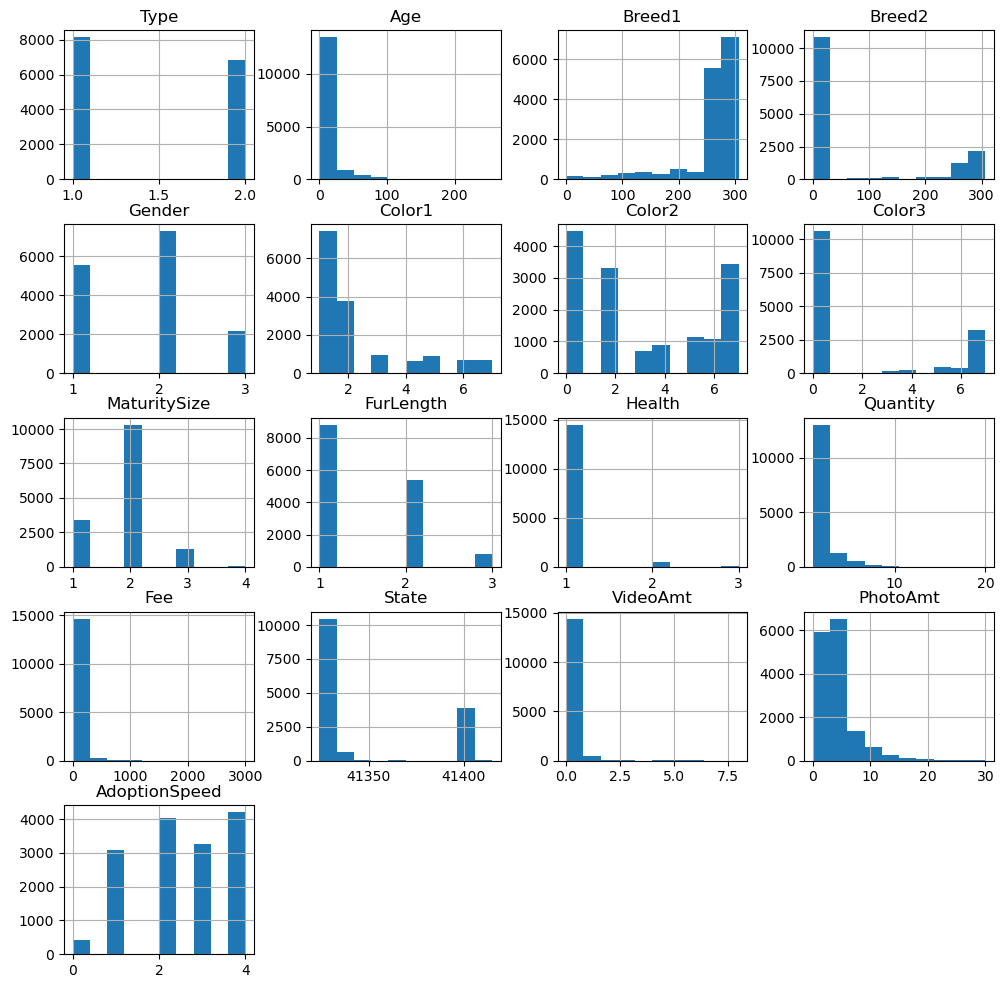

In [25]:
# Variables histograms

import matplotlib.pyplot as plt

df.hist(figsize=(12, 12))
plt.show()

In [26]:
# Pets of mixed breed (Breed1 = 307)
count = df[df['Breed1'] == 307].shape[0]
print(count)    # 1499

# Las 10 razas mas comunes (Breed1)
breed_counts = df['Breed1'].value_counts()
most_common_breeds = breed_counts.nlargest(10)
print(most_common_breeds)
#most_common_breeds_names = df_breeds[df_breeds['BreedID'].isin(most_common_breeds.index)]['BreedName']
#for breed, count in zip(most_common_breeds_names, most_common_breeds):
#    print(f"{breed}: {count}")

# Las 10 razas mas comunes (Breed2)
breed2_counts = df['Breed2'].value_counts()
most_common_breeds2 = breed2_counts.nlargest(10)
print(most_common_breeds2)



5927
Breed1
307    5927
266    3634
265    1258
299     342
264     296
292     264
285     221
141     205
205     190
179     167
Name: count, dtype: int64
Breed2
0      10762
307     1727
266      599
265      321
299      138
264      125
292      105
218       91
141       86
285       78
Name: count, dtype: int64


In [30]:
# Correlation of variables

df_numerical = df.select_dtypes(include=['int64', 'float64'])

df_numerical.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

#sns.pairplot(df, hue="AdoptionSpeed")
#plt.show()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.0,-0.15,0.058,-0.044,0.061,0.098,0.25,0.2,-0.17,0.003,-0.0069,0.036,-0.042,0.12,-0.006,0.049,-0.091
Age,-0.15,1.0,-0.31,-0.041,-0.12,0.09,-0.039,-0.054,0.094,0.15,0.1,-0.11,0.089,0.025,-0.016,-0.085,0.1
Breed1,0.058,-0.31,1.0,-0.16,0.071,-0.036,-0.0071,-0.00068,-0.011,-0.11,-0.035,0.09,-0.19,-0.027,0.021,0.043,0.11
Breed2,-0.044,-0.041,-0.16,1.0,0.057,-0.02,0.003,0.036,0.05,0.11,-0.029,0.038,0.014,-0.038,0.0016,0.046,-0.019
Gender,0.061,-0.12,0.071,0.057,1.0,-0.12,0.027,0.26,-0.092,-0.03,-0.045,0.49,-0.05,0.0026,0.017,0.098,0.058
Color1,0.098,0.09,-0.036,-0.02,-0.12,1.0,-0.11,-0.28,-0.029,0.067,0.024,-0.12,0.054,0.024,-0.0064,-0.041,-0.044
Color2,0.25,-0.039,-0.0071,0.003,0.027,-0.11,1.0,0.089,-0.065,-0.0088,-0.0043,0.02,-0.017,0.027,0.024,0.059,-0.039
Color3,0.2,-0.054,-0.00068,0.036,0.26,-0.28,0.089,1.0,-0.052,0.014,-0.025,0.27,-0.02,0.011,0.02,0.1,-0.007
MaturitySize,-0.17,0.094,-0.011,0.05,-0.092,-0.029,-0.065,-0.052,1.0,0.095,-0.013,-0.043,0.041,-0.063,0.017,0.016,0.046
FurLength,0.003,0.15,-0.11,0.11,-0.03,0.067,-0.0088,0.014,0.095,1.0,0.028,-0.038,0.16,-0.029,-0.015,-0.032,-0.091
